In [72]:
from graphviz import Digraph
from autodiff.engine import Value 
from autodiff.NN import MLP

In [73]:
def trace(root):
    nodes, edges = set(), set()
    # def build(v):
    #     if v not in nodes:
    #         nodes.add(v)
    #         for child in v._prev:
    #             edges.add((child, v))
    #             build(child)
    # build(root)
    # return nodes, edges
    def build(v):
        if isinstance(v, list):  # Check if v is a list
            for elem in v:
                if elem not in nodes:
                    nodes.add(elem)
                    for child in elem._prev:
                        edges.add((child, elem))
                        build(child)
        else:
            if v not in nodes:
                nodes.add(v)
                for child in v._prev:
                    edges.add((child, v))
                    build(child)
    build(root)
    return nodes, edges
def draw_dot(root, format='svg', rankdir='LR'):
    assert rankdir in ['LR', 'TB']
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    nodes, edges = trace(root)
    for n in nodes:
        dot.node(name=str(id(n)), label = "{ data %.4f | grad %.4f }" % (n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))   
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)   
    return dot

In [74]:
#demo--1
x=[2.0,3.0,-1.0]
n=MLP(3,[4,4,1])
n(x)

[Value:data=0 grad=0]

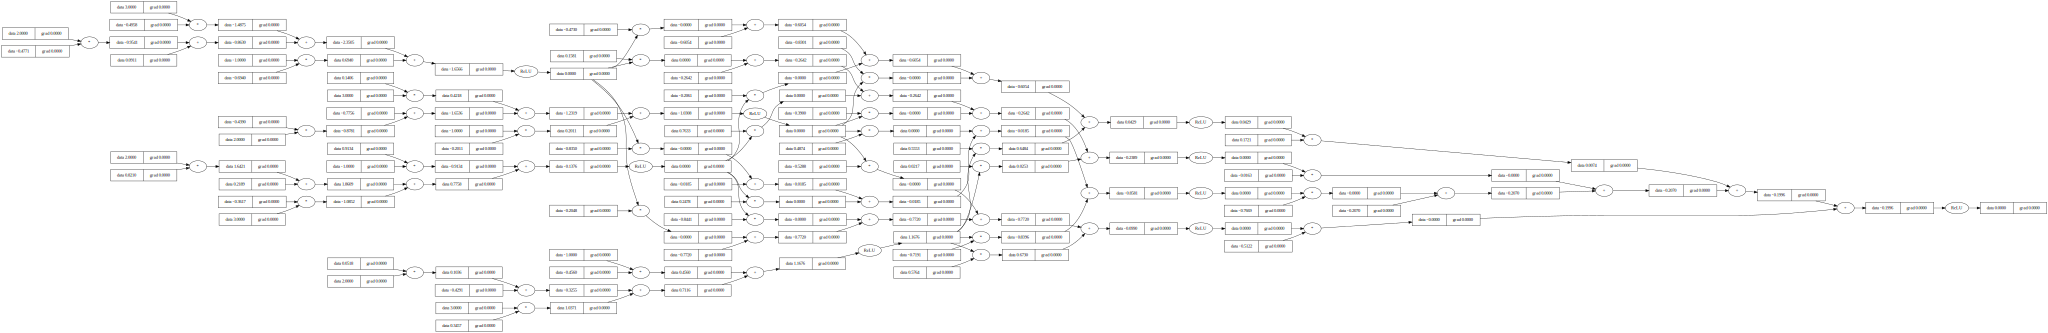

In [75]:
draw_dot(n(x))

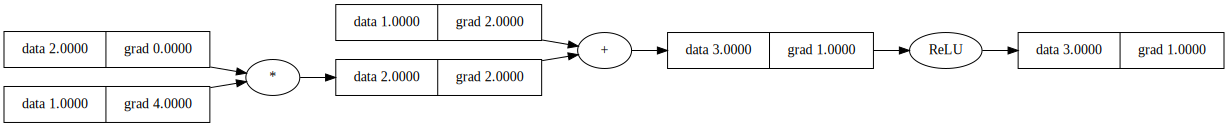

In [76]:
#demo--2
x = Value(1.0)
y = (x * 2 + 1).relu()
y.backward()
draw_dot(y)

In [77]:
#using torch autograd
import torch

In [78]:
x1=torch.tensor([2.0]).double()  ;x1.requires_grad=True
x2=torch.tensor([0.0]).double()  ;x2.requires_grad=True
w1=torch.tensor([-3.0]).double() ;w1.requires_grad=True
w2=torch.tensor([1.0]).double()  ;w2.requires_grad=True
b=torch.tensor([8.8]).double()   ;b.requires_grad=True
n=x1*w1+x2*w2+b
o=torch.relu(n)
print(o.data.item())
o.backward()

2.8000001907348633


In [79]:
print(f"x2:{x2.grad.item()}")
print(f"x1:{x1.grad.item()}")
print(f"w1:{w1.grad.item()}")
print(f"w2:{w2.grad.item()}")

x2:1.0
x1:-3.0
w1:2.0
w2:0.0


In [80]:
n=MLP(3,[4,4,1])

In [81]:
#demo--3
ml=[
    [2.0,3.0,-1.0],
    [3.0,-1.0,0.5],
    [0.5,1.0,1.0],
    [1.0,1.0,-1.0]
]
y=[1.0,-1.0,-1.0,1.0]

In [82]:
for k in range(20):
    # forward pass
    yhat=[n(x) for x in ml]
    yhat_values = [yhat_elem[0] for yhat_elem in yhat]
    mse= sum((yout-ygt)**2  for ygt,yout in zip(y,yhat_values))
    #backward pass
    mse.backward()
    #update
    for p in n.parameters():
        p.data+=-0.05*p.grad
    print(k,mse.data)

0 4.256209640144097
1 4.0
2 4.0
3 4.0
4 4.0
5 4.0
6 4.0
7 4.0
8 4.0
9 4.0
10 4.0
11 4.0
12 4.0
13 4.0
14 4.0
15 4.0
16 4.0
17 4.0
18 4.0
19 4.0


In [83]:
yhat

[[Value:data=0 grad=-9.0],
 [Value:data=0 grad=9.0],
 [Value:data=0 grad=7.0],
 [Value:data=0 grad=-3.0]]

In [84]:
print(n.layers[0].neurons[0].w[0].grad)
print(n.layers[0].neurons[0].w[0].data)

390.0
-204.96818153312603
